# Kuzushiji-MNIST / Math 10 Final Project

# Load the data from Kaggle
First download the data file in `.npz` format (native Numpy format) from [Kaggle competition website](https://www.kaggle.com/c/uci-math-10-winter2019) or directly from the [Kuzushiji repo on Kaggle](https://www.kaggle.com/anokas/kuzushiji), put them in the same folder with this notebook. The following cell will load the file as numpy arrays.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
def load(file):
    return np.load(file)['arr_0']

# Load the data
x_train = load('kmnist-train-imgs.npz') # the images for training
y_train = load('kmnist-train-labels.npz') # the labels (category) for images 

# the images for testing that have been randomly permuted
x_test = load('kmnist-test-imgs-perm.npz') 

# Visualize samples
Notice `x_train` and `x_test` are numpy arrays with dimensions `(60000, 28, 28)` and `(10000, 28, 28)`, so that `x_train[i,:,:]` and `x_test[i,:,:]` represent images for training and testing, respectively. We can plot first 20 samples from the `x_train`, and we make the title as their label (which category they belong) as follows: for example, in the plotted images, the first character in the first row is of category 8.

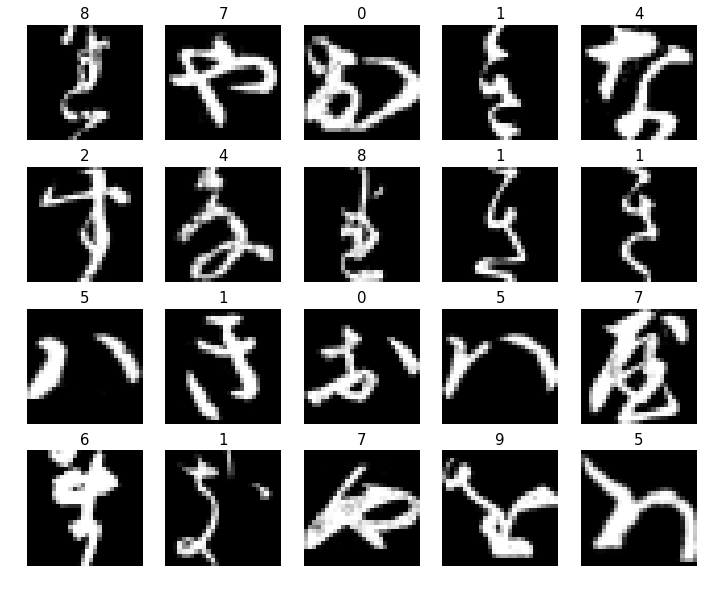

In [28]:
fig, axes = plt.subplots(4,5, figsize=(12, 10))
axes = axes.reshape(-1)

for i in range(20):
    axes[i].axis('off') # hide the axes ticks
    axes[i].imshow(x_train[i,:,:], cmap = 'gray')
    axes[i].set_title(str(y_train[i]), color= 'black', fontsize=15)
plt.show()

# Flatten the images for your model(s)
To apply the algorithms we learn in class to train an image classifier, we need to first clean the data to flatten every 28 by 28 gray scale image to a 784 array. We rename these flattened data as capital `X_train` and `X_test`.

In [4]:
# Flatten images
X_train = np.reshape(x_train, (-1, 784))
X_test = np.reshape(x_test, (-1, 784))

In [5]:
X_train.shape # this should be (60000,784), same with MNIST

(60000, 784)

In [6]:
X_test.shape # this should be (10000,784), same with MNIST

(10000, 784)

In [7]:
old_X_train = X_train
old_y_train = y_train
real_X_test = X_test

# Test trained model
After model has been trained using all or selected samples from `X_train` and `y_train`. You should obtain a solution of the prediction of the labels by your model using the testing data `X_test`, for example, scikit learn's KNN object's [`predict` function](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.predict).

### Remark:
Since you do not have access to `y_test`, to cross-validate your model, you can split the training samples to two sets, one is training dataset, the other is your cross-validation dataset (so that you have access to the `y` label of this set). This trick is usually used for Kaggle competition.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from scipy.spatial import distance
import time

# with SGD

#### Stochastic Gradient Descent
<img src="images/image1.png" width="500">

In [39]:
# Split training data
X_train, X_test, y_train, y_test =  train_test_split(old_X_train, old_y_train, test_size=0.2)

In [40]:
kmnist_sgd = SGDClassifier(alpha=1e-3, max_iter=5000, tol=1e-5)
starting_time = time.process_time()
kmnist_sgd.fit(X_train, y_train)
print("Data fitting takes", time.process_time() - starting_time, "seconds")
print("Testing Accuracy", kmnist_sgd.score(X_test, y_test))

Data fitting takes 294.172008 seconds
Testing Accuracy 0.72075


# with PCA + SGD

#### Principal Component Analysis
<img src="images/image3.jpg" width="400">

In [59]:
# Split training data
X_train, X_test, y_train, y_test =  train_test_split(old_X_train, old_y_train, test_size=0.2)

# Preprocessing
kmnist_pca = PCA(n_components=0.95)
kmnist_pca.fit(X_train)
X_train_reduced = kmnist_pca.transform(X_train)
X_test_reduced = kmnist_pca.transform(X_test)

In [60]:
kmnist_sgd = SGDClassifier(alpha=1e-3, max_iter=5000, tol=1e-5)
starting_time = time.process_time()
kmnist_sgd.fit(X_train_reduced, y_train)
print("Data fitting takes", time.process_time() - starting_time, "seconds")
print("Testing Accuracy", kmnist_sgd.score(X_test_reduced, y_test))

Data fitting takes 75.24192800000014 seconds
Testing Accuracy 0.75825


# with kmeans + kNN

#### k-Means Clustering
<img src="images/image4.png" width="400">

#### k-Nearest Neighbors
<img src="images/image2.png" width="200">

In [14]:
# Split training data
X_train, X_test, y_train, y_test =  train_test_split(old_X_train, old_y_train, test_size=0.2)

# Preprocessing 
kmeans = KMeans(n_clusters=12, max_iter = 5000).fit(X_train)
X_train_cluster = kmeans.transform(X_train)
X_test_cluster = kmeans.transform(X_test)

In [15]:
kmnist_knn = KNeighborsClassifier(n_neighbors=10, weights='distance', algorithm='kd_tree', leaf_size=100, p=3)
starting_time = time.process_time()
kmnist_knn.fit(X_train_cluster, y_train)
print("Data fitting takes", time.process_time() - starting_time, "seconds")
print("Testing Accuracy", kmnist_knn.score(X_test_cluster, y_test))

Data fitting takes 0.06553000000008069 seconds
Testing Accuracy 0.8449166666666666


# with PCA + kNN

In [21]:
# Split training data
X_train, X_test, y_train, y_test =  train_test_split(old_X_train, old_y_train, test_size=0.2)

# Preprocessing
kmnist_pca = PCA(n_components=0.95).fit(X_train)
X_train_reduced = kmnist_pca.transform(X_train)
X_test_reduced = kmnist_pca.transform(X_test)

In [23]:
kmnist_pca_knn = KNeighborsClassifier(n_neighbors=7, weights='distance', algorithm='kd_tree',leaf_size=100, p=2)
starting_time = time.process_time()
kmnist_pca_knn.fit(X_train_reduced, y_train)
print("Data fitting takes", time.process_time() - starting_time, "seconds")
print("Testing Accuracy", kmnist_pca_knn.score(X_test_reduced, y_test))

Data fitting takes 1.2454680000000735 seconds
Testing Accuracy 0.9609166666666666


In [12]:
# Using this model to predict the real X test dataset
real_X_test_reduced = kmnist_pca.transform(real_X_test)
y_pred = kmnist_pca_knn.predict(real_X_test_reduced)

# Export solutions and upload to Kaggle
The result predicted by the model can be named to `y_pred`, and be exported to a `.csv` file using the `np.savetxt()` function provided in the cell below. Your `y_pred` should be of a dimension `(10000,)` numpy array. Rename the resulting `solutions-yournames.csv` by replacing `yournames` by your team members' initials connected by hyphen and then upload to Kaggle.

In [13]:
solutions = np.zeros((10000, 2))
solutions[:,0] = np.arange(1,10001)
solutions[:,1] = y_pred
solutions = solutions.astype(int)
np.savetxt("solutions-hf.csv", solutions, 
           fmt='%s', header = 'Id,Category', delimiter = ',', comments='')

In [20]:
df = pd.read_csv("solutions-hf.csv")
df.head()

Id  Category
0   1         6
1   2         3
2   3         2
3   4         9
4   5         4